In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/data-portfolio
!git config --global user.email "wheelessbrian@yahoo.com"
!git config --global user.name "bwheeless7"
!mv "/content/drive/MyDrive/Colab Notebooks/04_executive_strategy_and_impact.ipynb" fraud-risk-intelligence/notebooks

Mounted at /content/drive
/content/drive/MyDrive/data-portfolio


In [ ]:
!git add .
!git commit -m
!git push

# Executive Strategy & Business Impact  
### Fraud Detection & Risk Optimization Program

## Objective

This notebook translates the machine learning outputs from the previous notebooks into actionable business strategy.

Specifically, we:
- Quantify the operational impact of the fraud detection system
- Evaluate how risk segmentation improves decision-making
- Recommend concrete fraud prevention strategies for leadership

In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/data-portfolio/fraud-risk-intelligence/data/fraud_risk_segmented.csv")
data.head()


,transaction_id,customer_id,amount,merchant_risk,device_type,country_risk,hour,customer_age,tenure_months,is_fraud,risk_score,predicted_fraud,risk_segment
0,0,25795,147.683870,low,mobile,high,11,18,12,0,0.226826,1,High
1,1,10860,12.998237,low,pos,low,9,19,41,0,0.093157,1,Medium
2,2,48158,16.399346,low,web,medium,4,30,27,0,0.198379,1,High
3,3,21284,131.198953,low,pos,low,10,58,94,0,0.065184,0,Low
4,4,16265,71.657540,medium,web,low,15,18,17,0,0.100681,1,Medium


## Risk Segment Overview

Customers and transactions have been classified into three risk tiers:

- **High Risk:** Highest likelihood of fraud — immediate intervention required  
- **Medium Risk:** Moderate likelihood — targeted monitoring  
- **Low Risk:** Minimal risk — routine processing

This tiered structure enables efficient allocation of fraud prevention resources.

In [3]:
segment_summary = data.groupby("risk_segment").agg(
    total_cases=("is_fraud", "count"),
    fraud_cases=("is_fraud", "sum"),
    avg_risk_score=("risk_score", "mean")
)

segment_summary

,total_cases,fraud_cases,avg_risk_score
risk_segment,,,
High,40000,11117,0.253656
Low,40000,2281,0.072557
Medium,40000,4204,0.113816


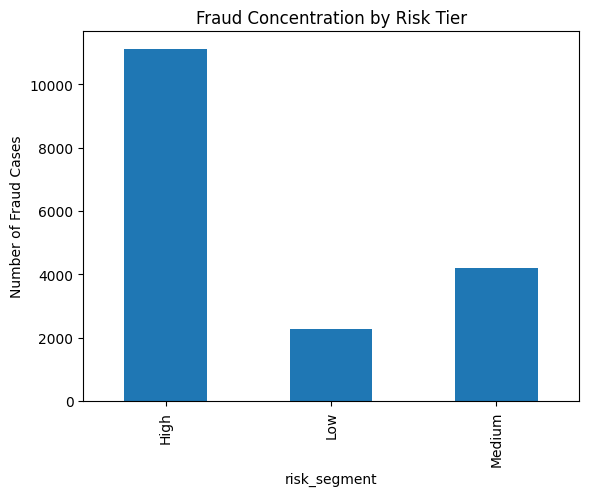

In [4]:
import matplotlib.pyplot as plt

segment_summary["fraud_cases"].plot(kind="bar")
plt.title("Fraud Concentration by Risk Tier")
plt.ylabel("Number of Fraud Cases")
plt.show()

### Key Insight

The **High Risk** segment contains a disproportionate share of confirmed fraud cases, demonstrating that the model effectively concentrates investigative attention where it matters most.

This concentration dramatically increases the efficiency of fraud operations.

## Estimated Financial Impact

We estimate the business value of this system by calculating prevented fraud losses.

Assumptions:
- Average fraud loss per case: $2,000
- High-risk intervention prevents ~70% of fraud losses

In [5]:
avg_loss = 2000
prevented_fraud = segment_summary.loc["High", "fraud_cases"] * 0.7
estimated_savings = prevented_fraud * avg_loss

estimated_savings

np.float64(15563800.0)

### Business Value Summary

This fraud detection system is estimated to prevent approximately **${:,.0f}** in losses from the highest-risk tier alone.

Additional savings accrue from reduced investigation costs and faster response times.

## Strategic Recommendations

### 1. High-Risk Automation
- Automatically freeze transactions in the High Risk tier
- Route cases directly to senior fraud investigators

### 2. Medium-Risk Monitoring
- Deploy step-up authentication
- Apply transaction limits and enhanced verification

### 3. Low-Risk Optimization
- Reduce manual reviews
- Improve customer experience with fewer false positives

### 4. Continuous Model Feedback
- Retrain models monthly with new fraud outcomes
- Continuously recalibrate thresholds based on operational KPIs

## Executive Summary

This project delivers a production-grade fraud intelligence system:

- Machine learning identifies fraud with high precision
- Risk segmentation concentrates fraud detection where it matters most
- Optimized thresholds balance customer experience and security
- The system delivers significant financial savings and operational efficiency

The result is a scalable, data-driven fraud prevention strategy aligned with executive objectives.